In [1]:
from DataProcessing import extract_layer_thicknesses

path = r'test_data\spectra\+02_+05.csv'
thicknesses = extract_layer_thicknesses(path)
print(thicknesses[0])
print(thicknesses[1])


Captured lines:
"#   0 ""b-Ga2O3"" 112.578456 0.000000 200.000000 1"
"#   1 ""SiO2"" 21.490979 0.000000 40.000000 0"
112.578456
21.490979


In [3]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance, plot_nk, extract_layer_thicknesses
from Optimization import optimize_nk

In [5]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
path = r"D:\OneDrive - Cornell University\Hongrui\Cornell\Master's project\Code\Reflectance Fitting\bi2o3\set2\film_data_0.2.csv"
data1, left, right = process_data(path, left=400, right=700, uncertainty_threshold=None)
thickness1 = extract_layer_thicknesses(path)
print(thickness1)

# 2. Create multilayer system
n_points1 = 10 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("Bi2O3", thickness1[0], n_points1, left, right)
layer2 = ThinFilmLayer("sio2", thickness1[1], n_points1, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer1 = ThinFilmSystem([air, layer1, layer2, substrate])
R1, _, _ = multilayer1.calculate_RTA(data1['wavelength'])

# 3. Optimization (The most time-consuming step!)
optimal_data1, optimized_params1 = optimize_nk(multilayer1, layer_index=1, data=data1, n_points=n_points1, weight_n=1, weight_k=10e3, weight_second_diff_n=1, weight_second_diff_k=10e3, ftol=10e-4)
print(optimal_data1.shape)



Captured lines:
#   3 "Bi2O3" 399.977531 0.000000 1000.000000 1
#   4 "SiO2" 200.000000 0.000000 80.000000 0
[399.977531, 200.0]
nk data found for air.
nk data found for Bi2O3.
nk data found for sio2.
nk data found for c-Si.
Initial n of layer1 is: [2.3513021 2.3397694 2.3198373 2.3013575 2.2720013 2.2466624 2.2094891
 2.1810153 2.1511502 2.1345942]
Initial k of layer1 is: [0 0 0 0 0 0 0 0 0 0]
Optimal n:  [1.99534047 2.21646061 2.35395521 2.34825717 2.24740919 2.20655213
 2.17515778 2.14714211 2.13805596 2.18326613]
Optimal k:  [0.00269761 0.0065202  0.00939852 0.01149558 0.01895562 0.03190399
 0.03797014 0.04516579 0.05262725 0.05392125]
Optimal Thickness:  402.1005788584547
(875,)


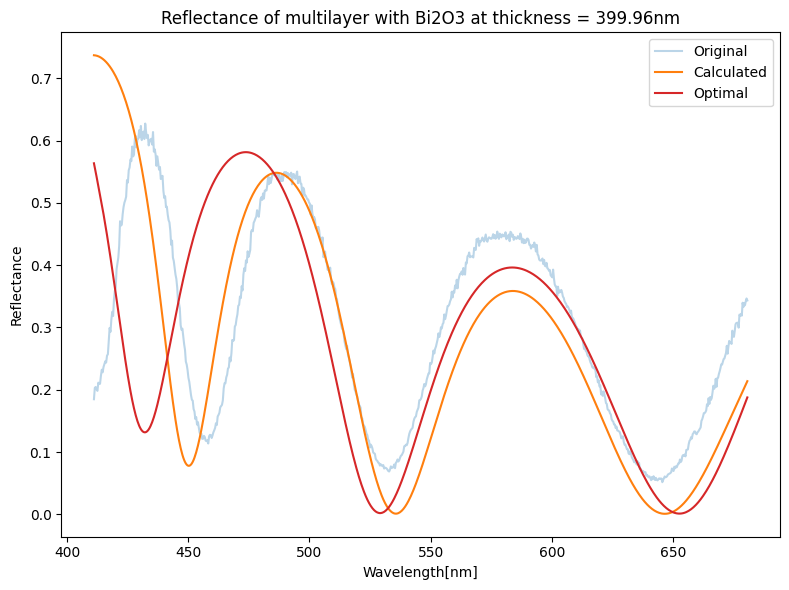

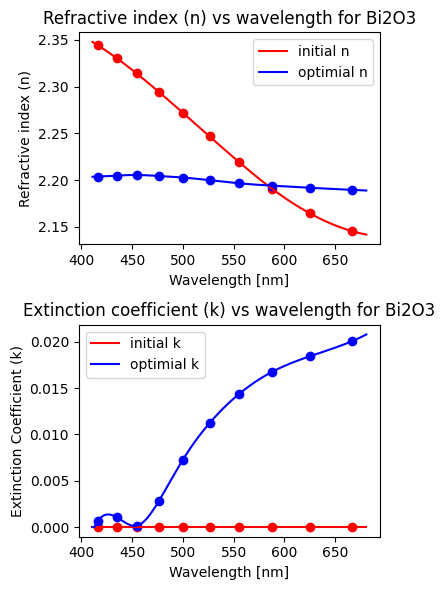

In [41]:
# 4. Plot the reflectance
plot_reflectance(data1, smooth=False, multilayer=multilayer1, layer_index=1, calculated_data=R2, optimal_data=optimal_data1)
plot_nk(data1, optimized_params1, n_points1, multilayer1, layer_index=1)

In [4]:
# We want to save the plots of R and nk at every iteration.

# 1. Set the paths to save the plots
REFLECTANCE_PLOT_PATH = "R_nk_plot_gif/R_gif/"
NK_PLOT_PATH = "R_nk_plot_gif/nk_gif/"

# 2. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
path1 = r"D:\OneDrive - Cornell University\Hongrui\Cornell\Master's project\Code\Reflectance Fitting\bi2o3\set2\film_data_0.2.csv"
data1, left, right = process_data(path1, uncertainty_threshold=0.005)
thickness1 = extract_layer_thicknesses(path1)
print(thickness1)

# 3. Create multilayer system
n_points1 = 10 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("Bi2O3", thickness1[0], n_points1, left, right)
layer2 = ThinFilmLayer("sio2", thickness1[1], n_points1, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer1 = ThinFilmSystem([air, layer1, layer2, substrate])
initial_reflectance1, _, _ = multilayer1.calculate_RTA(data1['wavelength'])

# 4. Optimization
optimal_data1, optimized_params1 = optimize_nk(multilayer1, layer_index=1, data=data1, n_points=n_points1, weight_n=1, weight_k=10e3, weight_second_diff_n=1, weight_second_diff_k=10e3, ftol=10e-4)


Initial n of layer1 is: [2.3439317 2.3304675 2.3140168 2.2945187 2.2720013 2.2466624 2.2190297
 2.1903517 2.1643813 2.1452694]
Initial k of layer1 is: [0 0 0 0 0 0 0 0 0 0]


ValueError: `x_scale` must be 'jac' or array_like with positive numbers.

In [ ]:
# 4. After the optimization, create a GIF from the saved plots:
import imageio
import os

# Create GIF for reflectance
reflectance_plots = [os.path.join(REFLECTANCE_PLOT_PATH, f"reflectance_plot_{i}.png") for i in range(iteration_counter[0])]
imageio.mimsave(os.path.join(REFLECTANCE_PLOT_PATH, 'reflectance_optimization.gif'), [imageio.imread(plot) for plot in reflectance_plots], fps=5)

# Create GIF for n and k
nk_plots = [os.path.join(NK_PLOT_PATH, f"nk_plot_{i}.png") for i in range(iteration_counter[0])]
imageio.mimsave(os.path.join(NK_PLOT_PATH, 'nk_optimization.gif'), [imageio.imread(plot) for plot in nk_plots], fps=5)
